In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os, sys
%matplotlib inline

os.chdir('..\..\..\..')
print(os.getcwd())

from input_configuration import base_year

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



# % Tours by Destination District
# % Trips by Desitnation District
# % People by District

E:\projects\clients\PierceCounty\Models\BaseYear\Development\PierceCast


In [2]:
working_dir = r'outputs/agg/dash'
pd.options.display.float_format = '{:0,.2f}'.format
format_percent = "{:,.2%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

In [4]:
parcel_geog = pd.read_sql_table('parcel_'+base_year+'_geography', 'sqlite:///inputs/db/soundcast_inputs.db',
        columns=['District','CountyName','ParcelID'])

In [5]:
district_lookup = {1: 'Suburban Snohomish',
                  2: 'Everett-Lynwood-Edmonds',
                  3: 'North Seattle-Shoreline',
                  4: 'Seattle CBD',
                  5: 'West-South Seattle',
                  6: 'East Side',
                   7: 'Renton-FedWay-Kent',
                   8: 'Tacoma',
                   9: 'Kitsap',
                   10: 'South Pierce',
                   11: 'S.Kitsap'
                  }

# Average Distance by Tour Purpose

source,model,survey
pdpurp,,
Escort,6.96,3.88
Meal,5.34,4.22
Personal Business,6.77,5.49
School,3.67,4.28
Shop,4.79,4.53
Social,4.60,4.89
Work,11.54,11.51


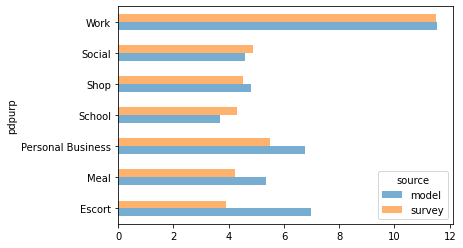

In [6]:
df = load_data('tour_distance')
# Trim any unreasonable survey distances off by taking max distance as max modeled bin value
max_model_dist = df.loc[(df['source']=='model'), 'tautodist_bin'].max()
df = df.loc[df['tautodist_bin'] <= max_model_dist]
df['wt_autodist'] = (df['tautodist_bin']+0.5)*(df['toexpfac'])
df_dist = pd.DataFrame()
for source in ['model','survey']:
    _df = df[(df['source'] == source)]
    df1 = _df.groupby('pdpurp').sum()[['wt_autodist']].reset_index()
    df2 = _df.groupby('pdpurp').sum()[['toexpfac']].reset_index ()
    _df = df1.merge(df2, on='pdpurp')
    _df['commute_distance'] = _df['wt_autodist']/_df['toexpfac']
    _df['source'] = source
    df_dist = df_dist.append(_df)
df = df_dist.pivot_table(index='pdpurp', columns='source', aggfunc='first', values='commute_distance')
df.rename(columns={'pdpurp': 'Tour Purpose'}, inplace=True)
df.drop('Change Mode Inserted Purpose', axis=0, inplace=True)
df.plot(kind='barh', alpha=0.6)
df

## Pierce County

source,model,survey
pdpurp,,
Escort,6.77,4.71
Meal,5.78,5.53
Personal Business,6.88,6.91
School,3.62,4.11
Shop,5.19,4.45
Social,4.39,3.90
Work,13.76,12.67


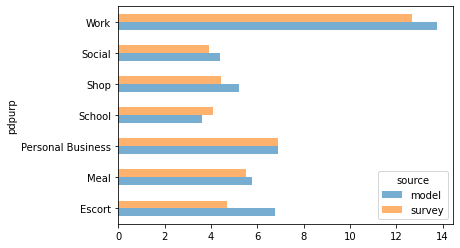

In [7]:
df = load_data('tour_distance')
df =  df.loc[df['person_county'] == 'Pierce']
# Trim any unreasonable survey distances off by taking max distance as max modeled bin value
max_model_dist = df.loc[(df['source']=='model'), 'tautodist_bin'].max()
df = df.loc[df['tautodist_bin'] <= max_model_dist]
df['wt_autodist'] = (df['tautodist_bin']+0.5)*(df['toexpfac'])
df_dist = pd.DataFrame()
for source in ['model','survey']:
    _df = df[(df['source'] == source)]
    df1 = _df.groupby('pdpurp').sum()[['wt_autodist']].reset_index()
    df2 = _df.groupby('pdpurp').sum()[['toexpfac']].reset_index ()
    _df = df1.merge(df2, on='pdpurp')
    _df['commute_distance'] = _df['wt_autodist']/_df['toexpfac']
    _df['source'] = source
    df_dist = df_dist.append(_df)
df = df_dist.pivot_table(index='pdpurp', columns='source', aggfunc='first', values='commute_distance')
df.rename(columns={'pdpurp': 'Tour Purpose'}, inplace=True)
df.drop('Change Mode Inserted Purpose', axis=0, inplace=True, errors='ignore')
df.plot(kind='barh', alpha=0.6)
df

## Other Counties

source,model,survey
pdpurp,,
Escort,7.02,3.62
Meal,5.26,3.88
Personal Business,6.74,5.18
School,3.69,4.33
Shop,4.69,4.55
Social,4.65,5.10
Work,11.07,11.23


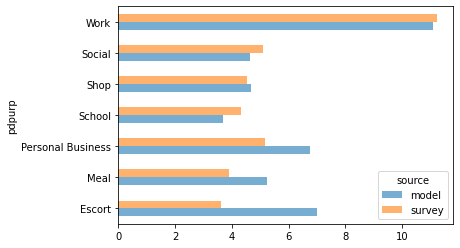

In [8]:
df = load_data('tour_distance')
df =  df.loc[df['person_county'] != 'Pierce']
# Trim any unreasonable survey distances off by taking max distance as max modeled bin value
max_model_dist = df.loc[(df['source']=='model'), 'tautodist_bin'].max()
df = df.loc[df['tautodist_bin'] <= max_model_dist]
df['wt_autodist'] = (df['tautodist_bin']+0.5)*(df['toexpfac'])
df_dist = pd.DataFrame()
for source in ['model','survey']:
    _df = df[(df['source'] == source)]
    df1 = _df.groupby('pdpurp').sum()[['wt_autodist']].reset_index()
    df2 = _df.groupby('pdpurp').sum()[['toexpfac']].reset_index ()
    _df = df1.merge(df2, on='pdpurp')
    _df['commute_distance'] = _df['wt_autodist']/_df['toexpfac']
    _df['source'] = source
    df_dist = df_dist.append(_df)
df = df_dist.pivot_table(index='pdpurp', columns='source', aggfunc='first', values='commute_distance')
df.rename(columns={'pdpurp': 'Tour Purpose'}, inplace=True)
df.drop('Change Mode Inserted Purpose', axis=0, inplace=True, errors='ignore')
df.plot(kind='barh', alpha=0.6)
df

# Average Distance by Tour Mode

source,model,survey
tmodetp,,
Bike,5.72,3.03
HOV2,7.24,6.70
HOV3+,6.88,6.22
SOV,8.74,8.50
School Bus,3.20,3.32
TNC,2.54,3.99
Transit,9.78,9.40
Walk,0.94,0.89


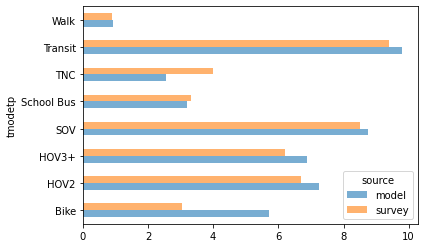

In [9]:
df = load_data('tour_distance')
# Trim any unreasonable survey distances off by taking max distance as max modeled bin value
max_model_dist = df.loc[(df['source']=='model'), 'tautodist_bin'].max()
df = df.loc[df['tautodist_bin'] <= max_model_dist]
df['wt_autodist'] = (df['tautodist_bin']+0.5)*(df['toexpfac'])
df_dist = pd.DataFrame()
for source in ['model','survey']:
    _df = df[(df['source'] == source)]
    df1 = _df.groupby('tmodetp').sum()[['wt_autodist']].reset_index()
    df2 = _df.groupby('tmodetp').sum()[['toexpfac']].reset_index ()
    _df = df1.merge(df2, on='tmodetp')
    _df['commute_distance'] = _df['wt_autodist']/_df['toexpfac']
    _df['source'] = source
    df_dist = df_dist.append(_df)
df = df_dist.pivot_table(index='tmodetp', columns='source', aggfunc='first', values='commute_distance')
df.rename(columns={'tmodetp': 'Tour Mode'}, inplace=True)

df.drop('Park', inplace=True)
df.plot(kind='barh', alpha=0.6)
df

## Pierce County

source,model,survey
tmodetp,,
Bike,5.90,4.78
HOV2,7.30,7.04
HOV3+,6.78,6.74
SOV,9.28,8.72
School Bus,3.16,2.72
TNC,2.71,10.34
Transit,20.18,15.27
Walk,0.99,0.92


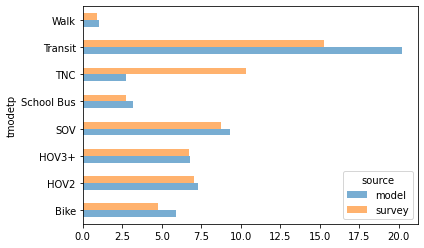

In [10]:
df = load_data('tour_distance')
df = df.loc[df['person_county']=='Pierce']
# Trim any unreasonable survey distances off by taking max distance as max modeled bin value
max_model_dist = df.loc[(df['source']=='model'), 'tautodist_bin'].max()
df = df.loc[df['tautodist_bin'] <= max_model_dist]
df['wt_autodist'] = (df['tautodist_bin']+0.5)*(df['toexpfac'])
df_dist = pd.DataFrame()
for source in ['model','survey']:
    _df = df[(df['source'] == source)]
    df1 = _df.groupby('tmodetp').sum()[['wt_autodist']].reset_index()
    df2 = _df.groupby('tmodetp').sum()[['toexpfac']].reset_index ()
    _df = df1.merge(df2, on='tmodetp')
    _df['commute_distance'] = _df['wt_autodist']/_df['toexpfac']
    _df['source'] = source
    df_dist = df_dist.append(_df)
df = df_dist.pivot_table(index='tmodetp', columns='source', aggfunc='first', values='commute_distance')
df.rename(columns={'tmodetp': 'Tour Mode'}, inplace=True)

df.drop('Park', inplace=True, errors='ignore')
df.plot(kind='barh', alpha=0.6)
df

## Other Counties

source,model,survey
tmodetp,,
Bike,5.68,2.84
HOV2,7.23,6.61
HOV3+,6.91,6.09
SOV,8.60,8.44
School Bus,3.22,3.57
TNC,2.51,3.60
Transit,8.79,8.96
Walk,0.92,0.88


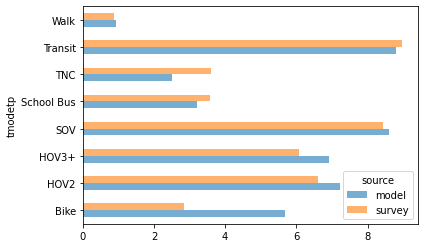

In [11]:
df = load_data('tour_distance')
df = df.loc[df['person_county']!='Pierce']
# Trim any unreasonable survey distances off by taking max distance as max modeled bin value
max_model_dist = df.loc[(df['source']=='model'), 'tautodist_bin'].max()
df = df.loc[df['tautodist_bin'] <= max_model_dist]
df['wt_autodist'] = (df['tautodist_bin']+0.5)*(df['toexpfac'])
df_dist = pd.DataFrame()
for source in ['model','survey']:
    _df = df[(df['source'] == source)]
    df1 = _df.groupby('tmodetp').sum()[['wt_autodist']].reset_index()
    df2 = _df.groupby('tmodetp').sum()[['toexpfac']].reset_index ()
    _df = df1.merge(df2, on='tmodetp')
    _df['commute_distance'] = _df['wt_autodist']/_df['toexpfac']
    _df['source'] = source
    df_dist = df_dist.append(_df)
df = df_dist.pivot_table(index='tmodetp', columns='source', aggfunc='first', values='commute_distance')
df.rename(columns={'tmodetp': 'Tour Mode'}, inplace=True)

df.drop('Park', inplace=True, errors='ignore')
df.plot(kind='barh', alpha=0.6)
df

# Trips per Tour by Tour Purpose
Average number of trip legs in a tour

source,model,survey
pdpurp,,
Escort,2.65,2.38
Meal,2.17,2.70
Personal Business,2.41,2.83
School,2.56,2.44
Shop,2.43,2.87
Social,2.24,2.78
Work,2.90,3.08


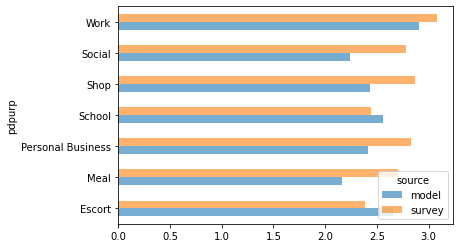

In [12]:
df = load_data('trips_by_tour')
df['wt_tot_trips'] = (df['tripsh1']+df['tripsh2'])*df['toexpfac']

df1 = df.pivot_table(columns='source', index='pdpurp', values='toexpfac', aggfunc='sum')
df2 = df.pivot_table(columns='source', index='pdpurp', values='wt_tot_trips', aggfunc='sum')

df = df2/df1
df.drop('Change Mode Inserted Purpose', axis=0, inplace=True, errors='ignore')
df.plot(kind='barh', alpha=0.6)
df

## Pierce County

source,model,survey
pdpurp,,
Escort,2.65,2.52
Meal,2.19,2.83
Personal Business,2.42,3.38
School,2.55,2.30
Shop,2.44,3.23
Social,2.25,2.85
Work,2.89,3.12


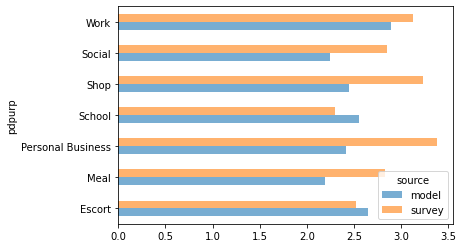

In [13]:
df = load_data('trips_by_tour')
df = df.loc[df['person_county']=='Pierce']
df['wt_tot_trips'] = (df['tripsh1']+df['tripsh2'])*df['toexpfac']

df1 = df.pivot_table(columns='source', index='pdpurp', values='toexpfac', aggfunc='sum')
df2 = df.pivot_table(columns='source', index='pdpurp', values='wt_tot_trips', aggfunc='sum')

df = df2/df1
df.drop('Change Mode Inserted Purpose', axis=0, inplace=True, errors='ignore')
df.plot(kind='barh', alpha=0.6)
df

## Other Counties

source,model,survey
pdpurp,,
Escort,2.65,2.34
Meal,2.16,2.67
Personal Business,2.41,2.71
School,2.56,2.48
Shop,2.43,2.77
Social,2.24,2.76
Work,2.91,3.07


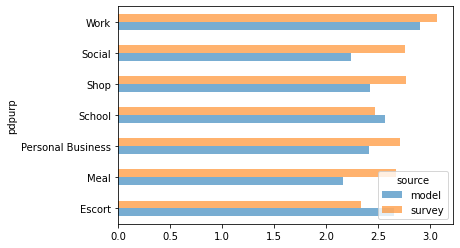

In [14]:
df = load_data('trips_by_tour')
df = df.loc[df['person_county']!='Pierce']
df['wt_tot_trips'] = (df['tripsh1']+df['tripsh2'])*df['toexpfac']

df1 = df.pivot_table(columns='source', index='pdpurp', values='toexpfac', aggfunc='sum')
df2 = df.pivot_table(columns='source', index='pdpurp', values='wt_tot_trips', aggfunc='sum')

df = df2/df1
df.drop('Change Mode Inserted Purpose', axis=0, inplace=True, errors='ignore')
df.plot(kind='barh', alpha=0.6)
df

# Trips per Tour by Tour Mode
Average number of trip legs in a tour

source,model,survey
tmodetp,,
Bike,2.47,2.39
HOV2,2.64,2.92
HOV3+,2.58,3.04
SOV,2.52,2.77
School Bus,2.37,2.31
TNC,2.27,2.85
Transit,2.67,3.02
Walk,2.27,2.18


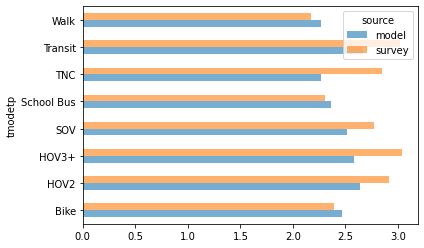

In [15]:
df = load_data('trips_by_tour')
df['wt_tot_trips'] = (df['tripsh1']+df['tripsh2'])*df['toexpfac']

df1 = df.pivot_table(columns='source', index='tmodetp', values='toexpfac', aggfunc='sum')
df2 = df.pivot_table(columns='source', index='tmodetp', values='wt_tot_trips', aggfunc='sum')

df = df2/df1
df.drop('Park', axis=0, inplace=True)
df.plot(kind='barh', alpha=0.6)
df

## Pierce County

source,model,survey
tmodetp,,
Bike,2.46,2.51
HOV2,2.63,3.33
HOV3+,2.57,3.17
SOV,2.51,2.82
School Bus,2.36,2.14
TNC,2.29,2.76
Transit,2.74,2.94
Walk,2.26,2.18


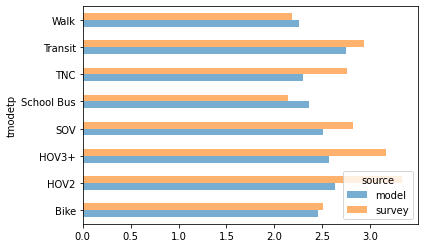

In [16]:
df = load_data('trips_by_tour')
df = df.loc[df['person_county']=='Pierce']
df['wt_tot_trips'] = (df['tripsh1']+df['tripsh2'])*df['toexpfac']

df1 = df.pivot_table(columns='source', index='tmodetp', values='toexpfac', aggfunc='sum')
df2 = df.pivot_table(columns='source', index='tmodetp', values='wt_tot_trips', aggfunc='sum')

df = df2/df1
df.drop('Park', axis=0, inplace=True)
df.plot(kind='barh', alpha=0.6)
df

## Other Counties

source,model,survey
tmodetp,,
Bike,2.47,2.37
HOV2,2.65,2.81
HOV3+,2.59,3.00
SOV,2.52,2.75
School Bus,2.37,2.38
TNC,2.26,2.85
Transit,2.66,3.03
Walk,2.27,2.17


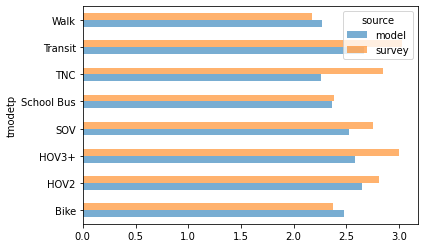

In [17]:
df = load_data('trips_by_tour')
df = df.loc[df['person_county']!='Pierce']
df['wt_tot_trips'] = (df['tripsh1']+df['tripsh2'])*df['toexpfac']

df1 = df.pivot_table(columns='source', index='tmodetp', values='toexpfac', aggfunc='sum')
df2 = df.pivot_table(columns='source', index='tmodetp', values='wt_tot_trips', aggfunc='sum')

df = df2/df1
df.drop('Park', axis=0, inplace=True)
df.plot(kind='barh', alpha=0.6)
df

# Tour Destinations by District
Total tours with primary destinations in each district

,model,survey
Suburban Snohomish,8.01%,8.82%
Everett-Lynwood-Edmonds,8.17%,7.36%
North Seattle-Shoreline,8.59%,10.19%
Seattle CBD,11.58%,10.76%
West-South Seattle,6.27%,5.75%
East Side,16.59%,19.50%
Renton-FedWay-Kent,16.29%,11.70%
Tacoma,7.20%,7.21%
Kitsap,5.70%,6.63%
South Pierce,10.19%,9.97%


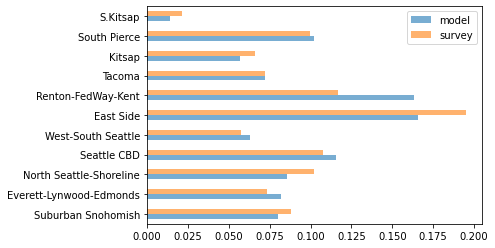

In [18]:
pd.options.display.float_format = '{:0,.2%}'.format

_df = pd.DataFrame()
for id, name in district_lookup.items():
    df = load_data('tour_total_tour_d_district_'+name)
    for source in ['model','survey']:
        _df.loc[name,source] = df[df['source'] == source]['toexpfac'].sum()
        
_df = _df/_df.sum()
_df.plot(kind='barh', alpha=0.6)
_df

## Pierce County

,model,survey
Suburban Snohomish,0.01%,0.01%
Everett-Lynwood-Edmonds,0.03%,0.00%
North Seattle-Shoreline,0.20%,0.37%
Seattle CBD,1.64%,1.51%
West-South Seattle,0.67%,1.09%
East Side,0.51%,1.41%
Renton-FedWay-Kent,9.13%,6.60%
Tacoma,32.96%,35.31%
Kitsap,0.98%,2.12%
South Pierce,48.02%,43.10%


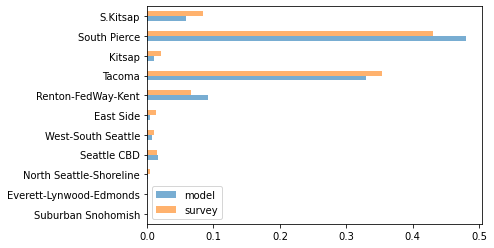

In [19]:
_df = pd.DataFrame()
for id, name in district_lookup.items():
    df = load_data('tour_total_tour_d_district_'+name)
    df = df.loc[df.person_county=='Pierce']
    for source in ['model','survey']:
        _df.loc[name,source] = df[df['source'] == source]['toexpfac'].sum()
        
_df = _df/_df.sum()
_df.plot(kind='barh', alpha=0.6)
_df

## Other Counties

,model,survey
Suburban Snohomish,9.99%,10.97%
Everett-Lynwood-Edmonds,10.17%,9.15%
North Seattle-Shoreline,10.65%,12.59%
Seattle CBD,14.02%,13.02%
West-South Seattle,7.65%,6.88%
East Side,20.55%,23.91%
Renton-FedWay-Kent,18.06%,12.94%
Tacoma,0.85%,0.36%
Kitsap,6.86%,7.73%
South Pierce,0.87%,1.89%


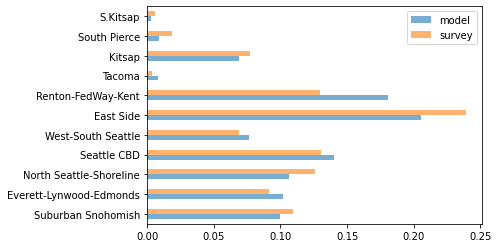

In [20]:
_df = pd.DataFrame()
for id, name in district_lookup.items():
    df = load_data('tour_total_tour_d_district_'+name)
    df = df.loc[df.person_county!='Pierce']
    for source in ['model','survey']:
        _df.loc[name,source] = df[df['source'] == source]['toexpfac'].sum()
        
_df = _df/_df.sum()
_df.plot(kind='barh', alpha=0.6)
_df